This notebook has been modified from the Cornell University Astronomy REU Python Workshops developed by M. Jones, M. Lam, and L. Leisman. It is designed to be a useful reference for folks trying to learn python for data analysis. The original is found is found at http://www.astro.cornell.edu/~leisman/mainold/helpfiles/python/teachpython.html. Note that this tutorial is built around Python 2 and there are a number of minor changes to keep in mind when learning Python 3.

-----

# A Brief Introduction To Python

## Resources

There are lots of resources out there to help one learn python. 

* For the complete beginner, and for those with only a small amount of experience: http://www.codecademy.com/tracks/python
* http://www.sthurlow.com/python/lesson01/ - This is another helpful tutorial for those who would like things explained in a slightly different way. This is more text and less actual coding than codecademy, and is a decent reference.
* Another thorough textual reference is http://en.wikibooks.org/wiki/Python_Programming
* For intermediate problem solving, check out https://projecteuler.net/problems
* Another excellent reference that includes lots of hands on workshops, and tutorials on how to do many astronomy related tasks is Python For Astronomers
* Also at the intermediate level, for people who know idl but want to switch to python, this is a super helpful page that steps you through the switch to python (I've also linked it below): http://www.astrobetter.com/wiki/tiki-index.php?page=Python+Tutorial+For+Astronomers+Who+Use+IDL
* For those who really know what they are doing, try learning more through data analysis (actually work on a data set). Some useful references include http://docs.scipy.org/doc/scipy/reference/optimize.html which lists of algorithms to solve a problems, and the [scipy cookbook](http://wiki.scipy.org/Cookbook). 
    
Most of the code I write I don't go digging through tutorials to remember snippets of how to do things instead, I use google, old code, and some good reference websites as detailed below:

* Google is usually the fastest way to get to your answer, so usually use google first.
* http://docs.python.org/2/tutorial/index.html - this is the main python guide, and has everything you could want and more.
* http://stackoverflow.com/ - usually the best answers to questions are here. Google your question, then click on stackoverflow links.
* http://matplotlib.org/gallery.html - whenever I want to make a complicated plot I look through the matplotlib gallery for something similar and copy the bits I need from the source code there. This is a super helpful resource.
* http://www.sthurlow.com/python/lesson01/ - Sometimes it's still useful to have a look back at lessons previously learned...
* I also find it very useful to search through old code using the grep command:  
`grep 'bit of code I’m looking for' /directory/of/code/*`
* You can also check out Luke's python notes (under development): http://astro.cornell.edu/~leisman/main/helpfiles/pythonhelp.html 

Many (older) astronomers are used to using idl. There are lots of good resources for idl users who want to switch to python:

* http://www.astrobetter.com/learning-python-the-diy-way/ This points to:
* http://www.astrobetter.com/wiki/tiki-index.php?page=Python+Tutorial+For+Astronomers+Who+Use+IDL Which is a super useful tutorial for working through if you are an astronomer who used to use idl.
* http://www.astrobetter.com/wiki/tiki-index.php?page=Python+Switchers+Guide - lists related astronomy functions.
* http://mathesaurus.sourceforge.net/idl-numpy.html - a list of syntax differences between idl and python
* http://www.scicoder.org/mapping-idl-to-python/ - an amazing list of idl commands and how to execute them in python 

-----

## Some example code 

Below shows example code that someone can help work through with you. The original can be downloaded [here](http://www.astro.cornell.edu/~leisman/mainold/helpfiles/python/Example.ipynb) (if you prefer an ipython notebook) or [here](http://www.astro.cornell.edu/~leisman/mainold/helpfiles/python/Example.py) (if you'd prefer just a normal python script). You can download the data used in the example [here](http://www.astro.cornell.edu/~leisman/mainold/helpfiles/python/ex_data.dat). Note that there is also a nice [html page](http://www.astro.cornell.edu/~leisman/mainold/helpfiles/python/Example.html) with the same information, along with both a [color](http://www.astro.cornell.edu/~leisman/mainold/helpfiles/python/Example_color.pdf) or [large print](http://www.astro.cornell.edu/~leisman/mainold/helpfiles/python/Example.pdf) pdf.

For those very new to python, one of the most important things to understanding python syntax is that python is an object oriented programming language. This means that python focuses around "objects," like say a list of numbers:

`>>> mylist = [1,2,3,4]`

mylist is a list object, which has certain properties and can be manipulated in certain ways. These manipulations, called methods, are properties of the list object, and thus are accessed by calling object.method(). So, for example, if you wanted to add the value 5 to the list, you do:

`>>> mylist.append(5)`  
`[1,2,3,4,5]`

In addition to methods of objects, you also can have functions that operate on objects. An example of this is if I want to know the length of mylist I can use the length function:

`>>>len(mylist)`  
`5`

With this in mind, have a go at the example and the example exercises below. Good luck! 

In [7]:
#Here I import the relevant function libraries
#This can be done in many ways
#To import an entire library (e.g. scipy) so that functions accessed by typing "lib_name.func_name"
%matplotlib inline
import matplotlib

#To import a subsection of a library
import scipy.optimize

#To import the whole library under a different name, so you can type "diff_name.func_name"
import numpy as np
import matplotlib.pyplot as plt

#To import just a particular function
from time import time
from math import sin
#This may be confusing but I'm grabbing a function usually denoted with "time.time"

In [8]:
#First of all we need to read the example data file into a list
#I will create an empty list and append the data as I read the file
#Note appending is a VERY inefficient opperation, however for less than a ~million repeats it's fine

#Make an empty list:
datalist = []

#Open the file. Here the 'r' means 'read'
f = open('ex_data.dat','r')

#Now read all the lines of the file into a list called lines
#For very large files this isn't always a good plan as you may not want to store the whole file in the memory, such files should be read line by line
lines = f.readlines()

#Now loop over ever line and record the value as a floating point number in datalist
#Notice that python's loop functionality is very flexible
for line in lines:
    datalist.append(float(line))
print datalist[:10]

[0.316566617533, 1.27780890341, -0.0842651455297, -0.834046738255, 0.0311669517215, -0.613703942266, -0.274017899322, 0.142874468776, 0.844543392978, -0.227686867042]


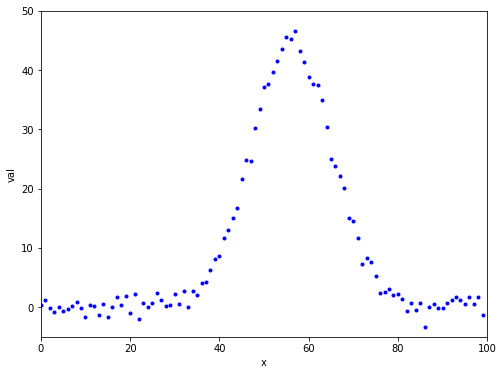

In [4]:
#Now we want to we want to create a plot
#Create a figure called 'fig' and a set of axes called 'ax'
fig,ax = plt.subplots(figsize=(8,6))

#Create a dummy list of numbers to plot along the x-axis
#We will create a numpy array using the 'numpy.arange()' function
#The syntax for this is (start_value,non_inclusive_end_value,step_size)
#Here I also use the 'len()' function which returns the length of a list/array
x_vals = np.arange(0,len(datalist),1)

#Now plot the data on the axes
#Here I choose to plot the data as blue dots
ax.plot(x_vals,datalist,'b.')

#Set the limits, and label the axes
ax.set_xlim(0,100)
ax.set_ylim(-5,50)
ax.set_xlabel('x')
ax.set_ylabel('val')

#Force the plot to be displayed
plt.show()

#Save the plot
fig.savefig('ex_fig.jpg',dpi=300)

In [5]:
#Now make a function of a gaussian distribution
def gaussian(x,mean,sigma,A):
    
    #Set the normalisation
    norm = A/(sigma*np.sqrt(2.*np.pi))
    
    return norm*np.exp( -((x-mean)**2.) / (2.*sigma**2.) )

In [6]:
#First we will fit this the bad, slow way

#Start with an impossibly large value of least_sq
least_sq = 1000000000.

#Loop over each parameter and over each value of x and calculate where least_sq is minimised
#Make some value approximate guesses of where the min/max values of the parameters are
for mean in np.arange(50.,60.,1.):
    for sigma in np.arange(5.,15.,1.):
        for A in np.arange(500.,1500.,10.):
            least_sq_temp = 0.
            for i in range(0,len(x_vals),1):
                #Add the current deviations to the temp value of least_sq
                least_sq_temp += (datalist[i] - gaussian(x_vals[i],mean,sigma,A))**2.
            
            #If least_sq_temp is a better fit than your current stored value then update the fit
            if least_sq_temp < least_sq:
                least_sq = least_sq_temp
                A_fit = A
                mean_fit = mean
                sigma_fit = sigma

print 'A = ',A_fit
print 'Mean = ',mean_fit
print 'Sigma = ',sigma_fit

A =  1010.0
Mean =  56.0
Sigma =  9.0


In [ ]:
#Reproduce the plot, but with the fit
fig,ax = plt.subplots(figsize=(8,6))

x_vals = np.arange(0,len(datalist),1)

#Here I select the plot the fit as a green, dotted, 2pt line
ax.plot(x_vals,gaussian(x_vals,mean_fit,sigma_fit,A_fit),lw=2,ls='dotted',color='green')
ax.plot(x_vals,datalist,'b.')

ax.set_xlim(0,100)
ax.set_ylim(-5,50)
ax.set_xlabel('x')
ax.set_ylabel('val')

plt.show()

#Save the plot
fig.savefig('ex_fit1_fig.jpg',dpi=300)

In [ ]:
#Now do the fit the smart way, by using a built in curve fitting function
#The function returns the fit parameters and the covariances
#The syntax is (function_to_fit, x_values, data_values, p0 = list_of_initial_guesses)
fit,cov = scipy.optimize.curve_fit(gaussian, x_vals, datalist, p0 = [55.,10.,800.])

print 'Mean = ',fit[0]
print 'Sigma = ',fit[1]
print 'A = ',fit[2]

In [ ]:
#Reproduce the plot, but with the new fit
fig,ax = plt.subplots(figsize=(8,6))

x_vals = np.arange(0,len(datalist),1)

ax.plot(x_vals,gaussian(x_vals,fit[0],fit[1],fit[2]),lw=2,ls='dashed',color='red')
ax.plot(x_vals,datalist,'b.')

ax.set_xlim(0,100)
ax.set_ylim(-5,50)
ax.set_xlabel('x')
ax.set_ylabel('val')

plt.show()

#Save the plot
fig.savefig('ex_fit2_fig.jpg',dpi=300)

In [ ]:
#This is the end of the example, but below are some useful things to note

In [ ]:
#Array Arithmetic

#When dealing with large lists (the norm in astronomy) array arithmetic is nearly always namy times faster
#You should write as much of your code using numpy arrays as you possibly can
#The only real drawback of arrays is that you cannot append values to them, they have fixed length

#Here I will take the sine of a million element array using a loop and using array arithmetic 
#Look at the difference in duration

#Generate an array of 10 million numbers between 0 and pi
val_arr = np.random.uniform(0,np.pi,int(1e6))


#Recast these arrays as lists
val_list = list(val_arr)

start_time = time()
#Note I've used the shorthand version of range here (the default start is 0 and default step is 1)
for i in range(len(val_arr)):
    #This will overwrite the current value with its sine
    val_list[i] = sin(val_list[i])
print "Loop time: ",(time()-start_time),"sec"

start_time = time()
val_arr = np.sin(val_arr)
print "Array arithmetic time: ",(time()-start_time),"sec"

In [ ]:
#Integer Arithmetic

#If you're not used to coding, I've got some bad news for you, computer are pretty dumb
#Python will identify what a number you give is by how you write it
#If the number doesn't have a decimal point it will assume it's an integer

print 3/2

print 3./2.

In [ ]:
#Pass by Reference vs Pass by Value

#In most cases python defaults to passing by reference
#This means that when you say 'a = b' you are essentially telling the computer that they are the same thing
#Whatever you do to b is also done to a

a = [1,2,3,4,5]
b = a

print a,b

#Delete the value 3 from the list a
a.remove(3)

print a,b

In [ ]:
#To overcome this you have to "trick" the computer into duplicating the list

a = [1,2,3,4,5]
#This will copy the array from 'start_point:end_point', the default is the start/end of the list
b = a[:]

a.remove(3)

print a,b

In [ ]:
#There some other tricks you can play with this

a = [1,2,3,4,5]

#To return the list in reverse
#This is saying go through the whole list, but stepping one place backwards each time
print a[::-1]

#To return every other value
print a[::2]

In [ ]:
#Another python is to use sets
#If you want to remove duplicates from a list you don't have to do a complicated algorithm

a = [1,1,2,3,3,3,3,4,5,5,5]

#To remove duplicates you can define the list as a set
#Sets are mathematical objects that cannot have duplicates
#Then you can redefine as a list
#Doing this all at once

print list(set(a))

## Demonstration exercises

Here are some sample exercises to work through. They demonstrate many techniques that we use all the time.

### Beginner Level

This exercise is designed for those who are fairly new to python and coding in general. It asks you to read in a list of numbers from a file and to write an algorithm to sort the list.

1. Using the techniques described in the example code above, read in [this file](PythonTutorial/beginner.txt) (PythonTutorial/beginner.txt) and store its contents as a list (f.readlines() will be useful). Print your list.
2. The list you've read in will be a list of strings. Write a for loop that converts each string in the list to an integer (using range(len(list))...). Print your updated list.
3. Next, create a second, empty list to store the sorted data in.
4. Now write a for loop that loops over the list you read in from file and:
    * stores the first entry
    * looks at each sucessive entry in the list and compares it to the stored entry.
    * If an entry is less than the stored entry, replace the stored entry with this new lowest value. 
5. Congratulations, you've now found the lowest value in the list. Take the value stored in your for loop and add it to your second list (using the list.append() method). Use the list.remove(x) method to remove the value you've just added to the second list from the first list.
6. Now repeat the process in steps 4 and 5 for each value in the initial list (do this by embedding steps 4 and 5 in a for loop; the syntax range(len(list)) will be useful here). [Note, you also could use a while statement, but we'll stick with for loops].
7. Print out your newly sorted list to make sure your algorithm worked.
8. If time permits, add a variable verbose, that when it's true you print out the list at each step of the way.
9. If time permits, come up with a more efficient method for sorting the list (there are many: it's fine to use google to see what sorting algorithms are out there. And of course, there's a python sort command - see if you can figure out how it works). 

Once you have finished the exercise you can compare your answers to my code [here](PythonTutorial/beginner.py). 

In [ ]:
# Some space for you to work

###  Intermediate Level

This exercise is designed for those who are already somewhat comfortable with python and want to learn more about exploiting its capabilities. It asks you to read in a file containing 10 time series, each containing a gaussian radio pulse. Then, using numpy and matplotlib, it asks you to plot the pulse, measure the pulse's signal to noise ratio, and output values in a nicely formatted table.

1. Read in [this file](PythonTutorial/intermediate.txt) (PythonTutorial/intermediate.txt).
2. The file contains 10 rows of comma separated numbers. Each row represents the amount of signal output from a radio antenna as a function of time (in 1 second time intervals). Loop through the lines in the file (f.readlines() will be useful here). For each line, do the following:
    1. Convert the line from one long string into a numpy array of floats.
    2. Using matplotlib.pyplot make a plot of the data you just read in as a function of time (hint: you'll have to figure out how many time steps are present in the data).
    3. Using the capabilities of numpy, find the value of the maximum flux in your time series.
    4. Excluding your pulse, (the pulse is in the first half of the time series, so you can cheat and just limit yourself to the second half of the time series) calculate the rms noise in your spectrum. (Recall that the rms is the root mean square - find the mean of the squares of all the points, then take the square root. You might also use np.std() and compare the results (and think about why they are different, if they are different)).
    5. Do a simple estimate of the signal to noise ratio of the pulse as peakflux/rms.
    6. Using a formatted string, print the output signal to noise, peakflux and rms to a descriptive table, rounding each number to two decimal places. 
3. If time permits figure out how to display all your time series on top of one another at the end, rather than having the plots pop up one at a time.
4. If time permits mess around with fitting the gaussian pulse and come up with other estimates of the signal to noise ratio. 

Once you have finished the exercise you can compare your answers to my code [here](PythonTutorial/intermediate.py). 

In [ ]:
# Some space for you to work

### Advanced Level

This exercise is for those who really know what they are doing in python and would like a challenge. Given a low signal to noise pulse series you're asked to determine the pulse frequency, and then pull the pulse out of the noise by smoothing the time series and folding the data.

1. Read in the data in [this file](PythonTutorial/advanced.txt) (PythonTutorial/advanced.txt) using whatever method you'd like.
2. Using the capabilities of scipy, take the fourier transform of the data and plot to determine the pulse frequency.
3. Smooth the spectrum using 3 channel hanning smoothing.
4. Fold the data to the period you determined earlier, and plot.
5. iterate as necessary. 


TBD

As an alternative exercise, use aplpy ("apple pie") to make an image of a field of ALFALFA data.

    Download [this fits] file, and plot it in inverted greyscale.
    Overplot a contour at 0.13 mJy/beam.
    There are two groups of galaxies in the image. Put a box around each one.
    Label the lower left group NGC 3227 group, and the upper right group the NGC 3190 group
    Make your axis labels bold, and give the figure a thick border
    Save a .png and .eps version of the figure 

Compare to my code to make a figure from one of my recent papers! 

In [ ]:
# Some space for you to work